# Brain Tumor Detection Using Convolutional Neural Networks (CNN)

This notebook explores the use of Convolutional Neural Networks (CNNs) for the important task of detecting brain tumors. By harnessing the potential of deep learning, our goal is to create an efficient and accurate model that can differentiate between different types of brain tumors using medical imaging data. Our approach involves data preprocessing, building a CNN architecture, training the model, and assessing its performance. This notebook is a comprehensive guide for anyone interested in learning about and implementing CNNs for analyzing medical images. Whether you're an experienced data scientist or new to the field, you'll discover valuable insights and practical steps to improve your machine learning abilities. Let's begin this journey to improve healthcare through technology!

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

E0000 00:00:1721020101.079289      13 common_lib.cc:798] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: === 
learning/45eac/tfrc/runtime/common_lib.cc:479
D0715 05:08:21.087398368      13 config.cc:196]                        gRPC EXPERIMENT call_status_override_on_cancellation   OFF (default:OFF)
D0715 05:08:21.087413965      13 config.cc:196]                        gRPC EXPERIMENT call_v3                                OFF (default:OFF)
D0715 05:08:21.087417375      13 config.cc:196]                        gRPC EXPERIMENT canary_client_privacy                  ON  (default:ON)
D0715 05:08:21.087419809      13 config.cc:196]                        gRPC EXPERIMENT capture_base_context                   ON  (default:ON)
D0715 05:08:21.087422206      13 config.cc:196]                        gRPC EXPERIMENT client_idleness                        ON  (defa

In [3]:
IMAGE_SIZE = 630
BATCH_SIZE = 32
CHANNEL = 3
EPOCHS = 50

In [4]:
data_set = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/brain-tumor-detection-mri/Brain_Tumor_Detection",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 3060 files belonging to 3 classes.


I0000 00:00:1721020319.552291      13 service.cc:145] XLA service 0x5c5c813c1750 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721020319.552342      13 service.cc:153]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1721020319.552346      13 service.cc:153]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1721020319.552349      13 service.cc:153]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1721020319.552351      13 service.cc:153]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1721020319.552354      13 service.cc:153]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1721020319.552356      13 service.cc:153]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1721020319.552359      13 service.cc:153]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1721020319.552361      13 service.cc:153]   StreamExecutor device (7): TPU, 2a886c8


In [9]:
class_names = data_set.class_names

In [10]:
def get_dataset_partition(ds, train_split = 0.7, test_split = 0.2, val_split = 0.1, shuffle=True, shuffle_size=1000):
  ds_size = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=20)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    test_size = ds_size - train_size - val_size

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size).take(test_size)

  return train_ds, test_ds, val_ds

In [11]:
train_ds, test_ds, val_ds = get_dataset_partition(data_set)
len(train_ds), len(test_ds), len(val_ds)

(67, 20, 9)

In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [13]:
resize_rescale_image = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255),
])

In [14]:
data_argumentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

In [15]:
Input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNEL)
n_classes = 3
model = models.Sequential([
    resize_rescale_image,
    data_argumentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape =( IMAGE_SIZE, IMAGE_SIZE, CHANNEL)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation= 'softmax')
])
model.build(input_shape = Input_shape)

/usr/local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 630, 630, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 630, 630, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 628, 628, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 314, 314, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 312, 312, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 156, 156, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 154, 154, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 77, 77, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 75, 75, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 37, 37, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 35, 35, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 17, 17, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 18496)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │     1,183,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,314,179 (5.01 MB)

 Trainable params: 1,314,179 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 284s 4s/step - accuracy: 0.6187 - loss: 0.7566 - val_accuracy: 0.7674 - val_loss: 0.6333
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 276s 4s/step - accuracy: 0.7902 - loss: 0.5579 - val_accuracy: 0.7743 - val_loss: 0.5502
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 275s 4s/step - accuracy: 0.7966 - loss: 0.4937 - val_accuracy: 0.8194 - val_loss: 0.5230
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 277s 4s/step - accuracy: 0.8017 - loss: 0.4919 - val_accuracy: 0.8194 - val_loss: 0.4873
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 277s 4s/step - accuracy: 0.8166 - loss: 0.4622 - val_accuracy: 0.8333 - val_loss: 0.4624
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 276s 4s/step - accuracy: 0.8350 - loss: 0.4090 - val_accuracy: 0.8438 - val_loss: 0.4546
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 279s 4s/step - accuracy: 0.8412 - loss: 0.4027 - val_accuracy: 0.8750 - val_loss: 0.3801
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 278s 4s/step - accuracy: 0.8858 - loss: 0.3214 - val_accuracy: 0.8889 - v

In [ ]:
model.evaluate(test_ds)

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

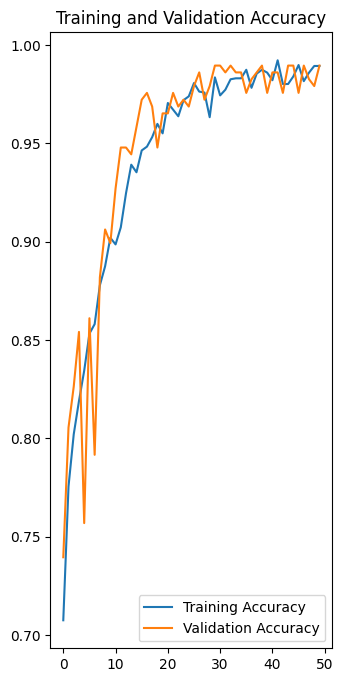

In [18]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

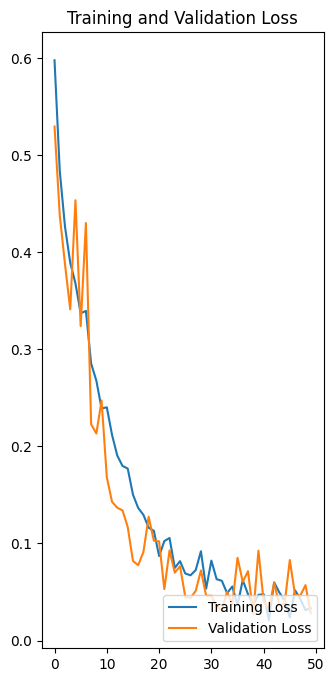

In [19]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Loss')

Print Image to Predict

Actual Label: no

1/1 [==============================] - 1s 821ms/step

Predicted Label: no


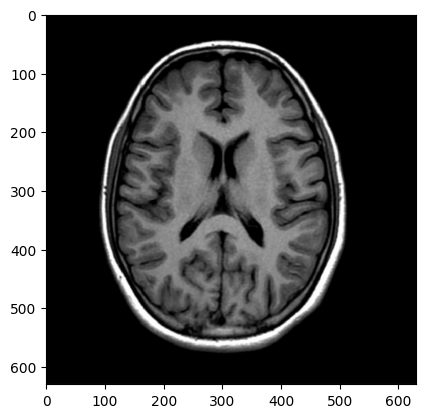

In [22]:
for images_batch, labels_batch in test_ds.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_batch = labels_batch[0]

  print('Print Image to Predict')
  plt.imshow(first_image)
  print('Actual Label:', class_names[first_batch])

  batch_prediction = model.predict(images_batch)
  print('Predicted Label:', class_names[np.argmax(batch_prediction[2])])

In [23]:
def predict(model, image):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

1/1 [==============================] - 0s 63ms/step

1/1 [==============================] - 0s 50ms/step

1/1 [==============================] - 0s 60ms/step

1/1 [==============================] - 0s 52ms/step

1/1 [==============================] - 0s 60ms/step

1/1 [==============================] - 0s 52ms/step

1/1 [==============================] - 0s 64ms/step

1/1 [==============================] - 0s 66ms/step

1/1 [==============================] - 0s 62ms/step


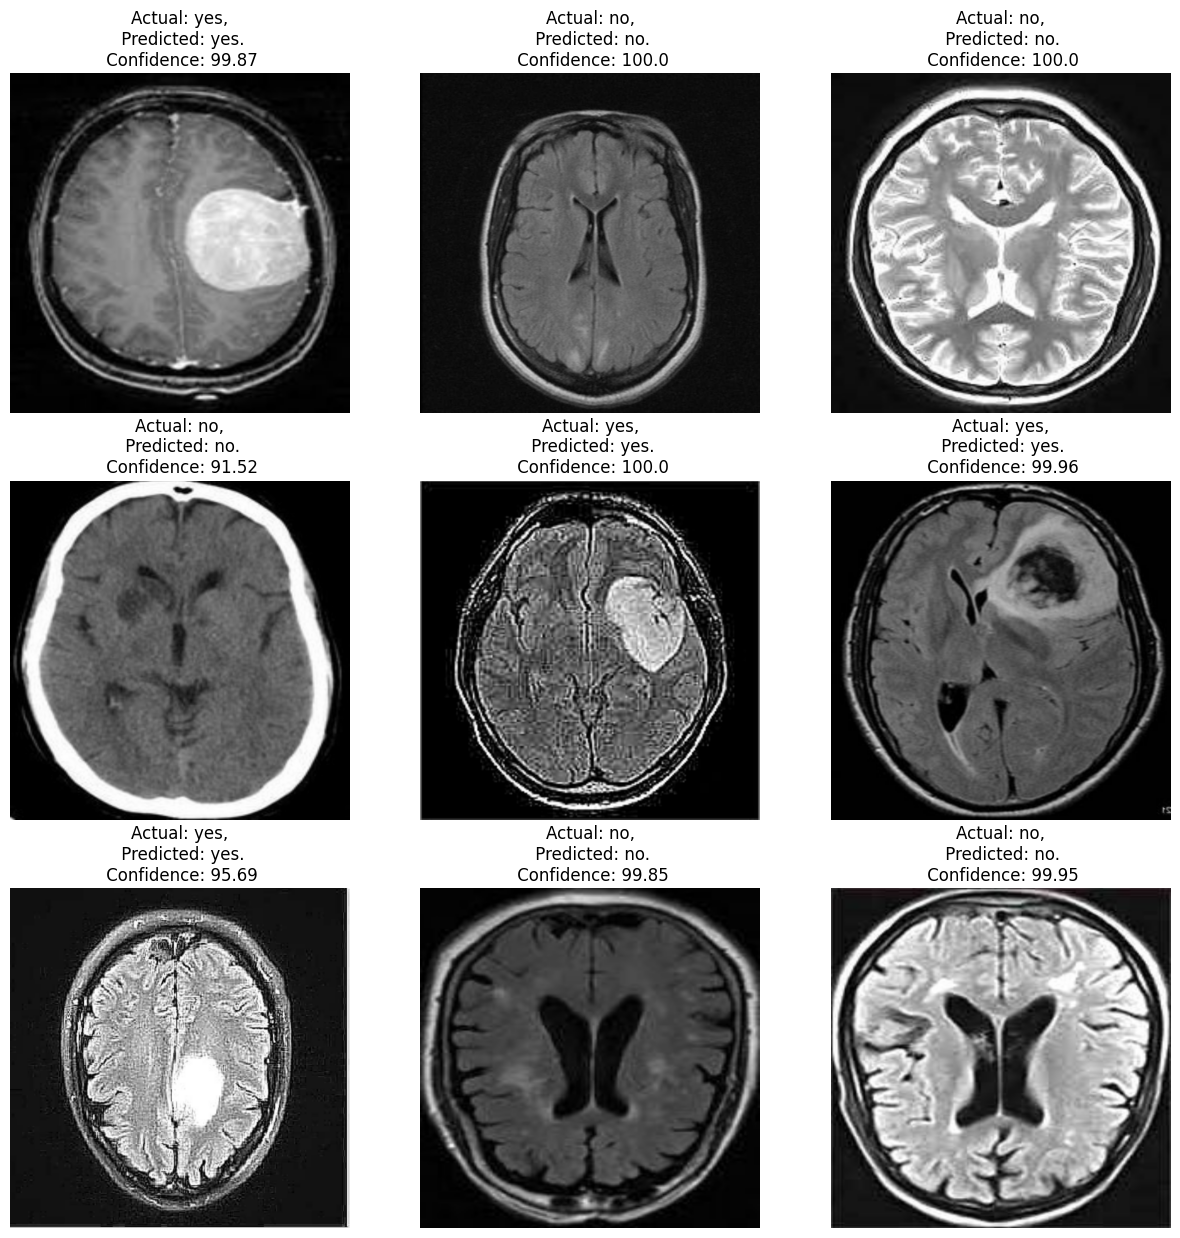

In [28]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))


    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f'Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}')

    plt.axis('off')